In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')
from scipy import linalg

In [2]:
clean = pd.read_csv('survey_32_clean.csv')

In [3]:
clean_N = [i for i in (clean['long'][clean['racial_group'] == 'black']).to_list() if type(i) != float]
clean_W = [i for i in (clean['long'][clean['racial_group'] == 'white']).to_list() if type(i) != float]
print(len(clean_N))
print(len(clean_W))

3448
1956


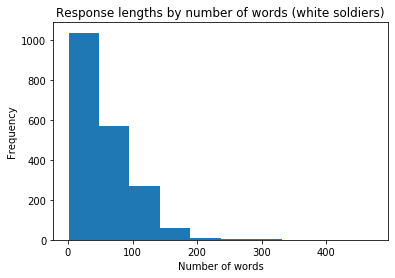

In [4]:
plt.hist([len(i.split(' ')) for i in clean_W]);
plt.title('Response lengths by number of words (white soldiers)')
plt.xlabel('Number of words');
plt.ylabel('Frequency');

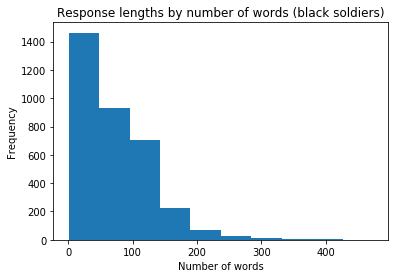

In [5]:
plt.hist([len(i.split(' ')) for i in clean_N]);
plt.title('Response lengths by number of words (black soldiers)')
plt.xlabel('Number of words');
plt.ylabel('Frequency');

In [6]:
def DEIM(M): # row/column selection
        p = []
        p.append(np.argmax(np.abs(M[:,0]))) # row index of the largest value in the first column of M
        for i in range(1,768):
            res = M[:,i] - np.dot(M[:,:i],np.dot(np.linalg.inv(M[:,:i][p]), M[:,i][p]))
            p.append(np.argmax(np.abs(res)))
        return p

## Embedding the responses

In [7]:
embed_N = model.encode(clean_N)
embed_W = model.encode(clean_W)

In [8]:
def split_responses(responses):
    all_sentences = []
    response_numbers = []
    idx = 0
    for i in responses:
        temp = i.split('.')
        for k in temp:
            response_numbers.append(idx)
        for j in temp:
            all_sentences.append(j)
        idx += 1
    return all_sentences, response_numbers

In [13]:
def get_index(rankings, responses):
    response_idx = []
    count = 0
    for i in rankings:
        temp = responses[i]
        if temp not in response_idx:
            response_idx.append(temp)
    return response_idx

In [83]:
embed_split_N = model.encode(split_responses(clean_N)[0])
embed_split_W = model.encode(split_responses(clean_W)[0])

## Applying DEIM

In [10]:
U, S, Vt = linalg.svd(embed_split_N)
U2, S2, Vt2 = linalg.svd(embed_split_W)

In [11]:
ranking_white = DEIM(U2)
ranking_black = DEIM(U)

In [12]:
sentences_W, response_number_W = split_responses(clean_W)
sentences_N, response_number_N= split_responses(clean_N)

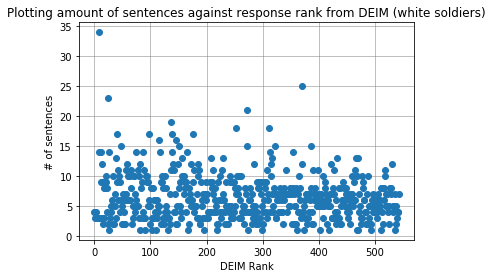

In [33]:
plt.plot([len(clean_W[i].split('.')) for i in get_index(ranking_white, response_number_W)], 'o')
plt.title('Plotting amount of sentences against response rank from DEIM (white soldiers)');
plt.ylabel('# of sentences');
plt.xlabel('DEIM Rank');
plt.grid(color='grey', linestyle='-', linewidth=.5)

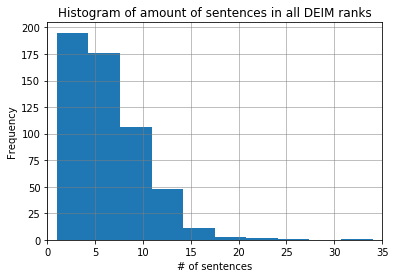

In [52]:
plt.hist([len(clean_W[i].split('.')) for i in get_index(ranking_white, response_number_W)])
plt.title('Histogram of amount of sentences in all DEIM ranks');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 35);

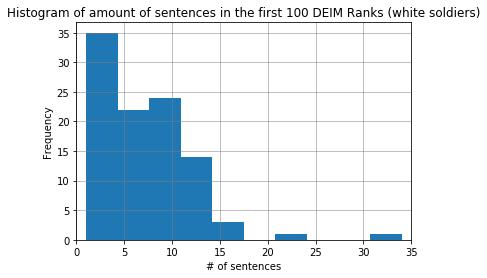

In [51]:
plt.hist([len(clean_W[i].split('.')) for i in get_index(ranking_white, response_number_W)][:100])
plt.title('Histogram of amount of sentences in the first 100 DEIM Ranks (white soldiers)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 35);

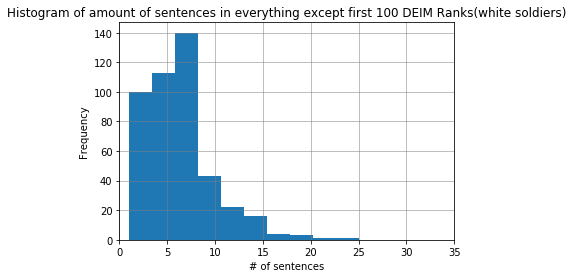

In [50]:
plt.hist([len(clean_W[i].split('.')) for i in get_index(ranking_white, response_number_W)][100:])
plt.title('Histogram of amount of sentences in everything except first 100 DEIM Ranks(white soldiers)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 35);

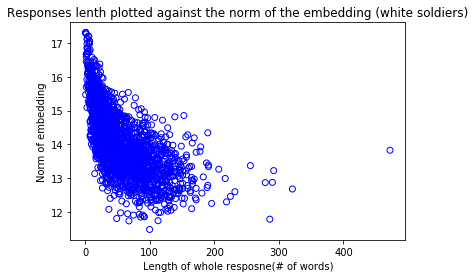

In [108]:
plt.scatter([len(i.split(' ')) for i in clean_W], [np.linalg.norm(i) for i in embed_W], color = 'blue', facecolor = 'none')
plt.title('Responses lenth plotted against the norm of the embedding (white soldiers)');
plt.ylabel('Norm of embedding');
plt.xlabel('Length of whole resposne(# of words)');

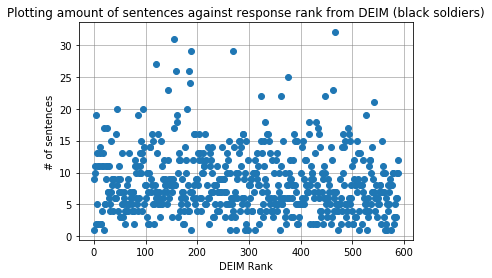

In [37]:
plt.plot([len(clean_N[i].split('.')) for i in get_index(ranking_black, response_number_N)], 'o')
plt.title('Plotting amount of sentences against response rank from DEIM (black soldiers)');
plt.ylabel('# of sentences');
plt.xlabel('DEIM Rank');
plt.grid(color='grey', linestyle='-', linewidth=.5)

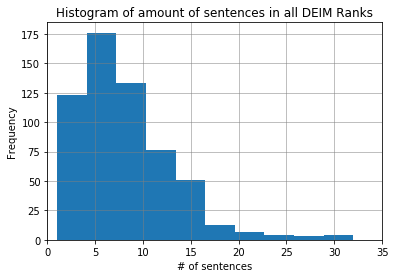

In [47]:
plt.hist([len(clean_N[i].split('.')) for i in get_index(ranking_black, response_number_N)])
plt.title('Histogram of amount of sentences in all DEIM Ranks');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 35);

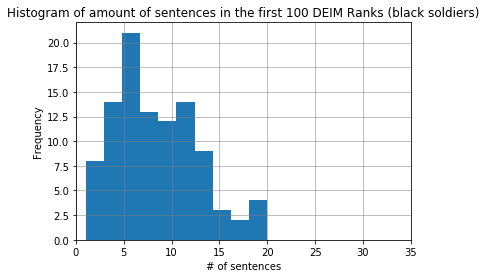

In [48]:
plt.hist([len(clean_N[i].split('.')) for i in get_index(ranking_black, response_number_N)][:100])
plt.title('Histogram of amount of sentences in the first 100 DEIM Ranks (black soldiers)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 35);

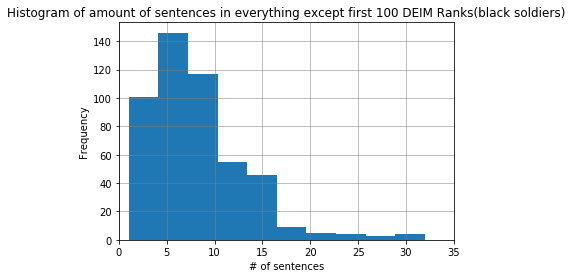

In [49]:
plt.hist([len(clean_N[i].split('.')) for i in get_index(ranking_black, response_number_N)][100:])
plt.title('Histogram of amount of sentences in everything except first 100 DEIM Ranks(black soldiers)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 35);

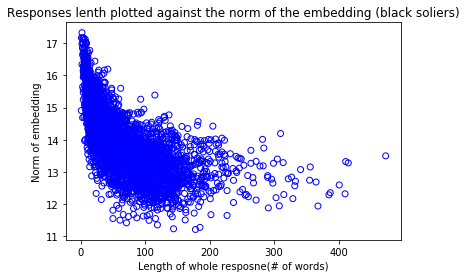

In [109]:
plt.scatter([len(i.split(' ')) for i in clean_N], [np.linalg.norm(i) for i in embed_N], color = 'blue', facecolor = 'none')
plt.title('Responses lenth plotted against the norm of the embedding (black soliers)');
plt.ylabel('Norm of embedding');
plt.xlabel('Length of whole resposne(# of words)');

# Taking a break for 64

In [53]:
from itertools import groupby

In [54]:
survey_64 = pd.read_csv('survey_64.csv')

In [55]:
no_nan = [i for i in survey_64['T7'] if i != np.nan]
no_f = [i for i in no_nan if type(i) != float]

In [56]:
sentences, response_number = split_responses(no_f)

In [57]:
len(sentences)

4478

In [58]:
len(response_number)

4478

In [59]:
freqs = [len(list(group)) for key, group in groupby(response_number)]

In [60]:
embed_64 = model.encode(sentences)

In [61]:
U_64, S_64, Vt_64 = linalg.svd(embed_64)

In [62]:
ranks_64 = DEIM(U_64)

In [63]:
def get_index(rankings, responses):
    response_idx = []
    count = 0
    for i in rankings:
        temp = responses[i]
        if temp not in response_idx:
            response_idx.append(temp)
    return response_idx

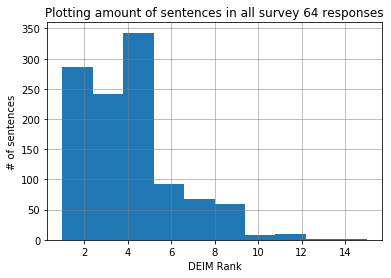

In [79]:
plt.hist([len(i.split('.')) for i in no_f]);
plt.title('Plotting amount of sentences in all survey 64 responses');
plt.ylabel('# of sentences');
plt.xlabel('DEIM Rank');
plt.grid(color='grey', linestyle='-', linewidth=.5)

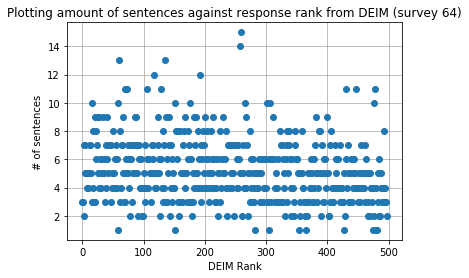

In [65]:
plt.plot([len(no_f[i].split('.')) for i in get_index(ranks_64, response_number)], 'o')
plt.title('Plotting amount of sentences against response rank from DEIM (survey 64)');
plt.ylabel('# of sentences');
plt.xlabel('DEIM Rank');
plt.grid(color='grey', linestyle='-', linewidth=.5)

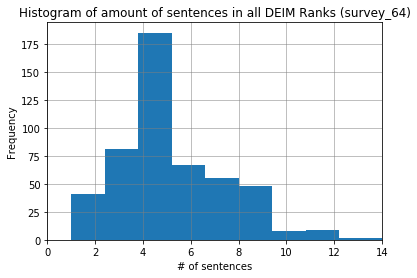

In [75]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_64, response_number)])
plt.title('Histogram of amount of sentences in all DEIM Ranks (survey_64)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 14);

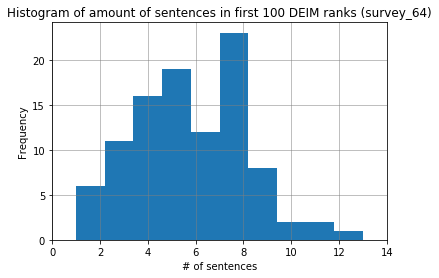

In [74]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_64, response_number)][:100])
plt.title('Histogram of amount of sentences in first 100 DEIM ranks (survey_64)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 14);

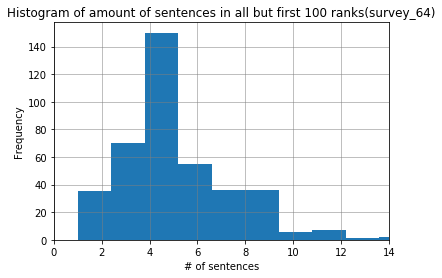

In [73]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_64, response_number)][100:])
plt.title('Histogram of amount of sentences in all but first 100 ranks(survey_64)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 14);

In [76]:
len(get_index(ranks_64, response_number))

498

In [80]:
full = model.encode(no_f)

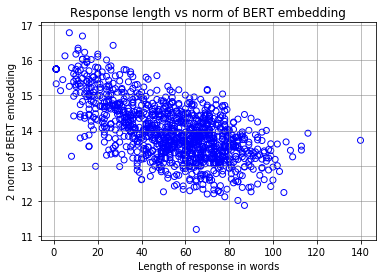

In [112]:
plt.scatter([len(i.split(' ')) for i in no_f], [np.linalg.norm(i) for i in full], color = 'blue', facecolor = 'none')
plt.title('Response length vs norm of BERT embedding')
plt.xlabel('Length of response in words')
plt.ylabel('2 norm of BERT embedding');
plt.grid(color='grey', linestyle='-', linewidth=.5)

## Same process with survey 144

In [113]:
survey_144 = pd.read_csv('survey_144.csv')

In [114]:
no_nan = [i for i in survey_144['T2'] if i != np.nan]
no_f = [i for i in no_nan if type(i) != float]

In [115]:
sentences, response_number = split_responses(no_f)

In [116]:
embed_144 = model.encode(sentences)

In [117]:
U_144, S_144, Vt_144 = linalg.svd(embed_144)

In [118]:
ranks_144 = DEIM(U_144)

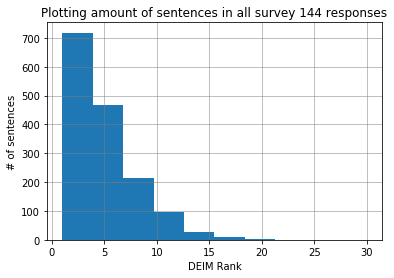

In [119]:
plt.hist([len(i.split('.')) for i in no_f]);
plt.title('Plotting amount of sentences in all survey 144 responses');
plt.ylabel('# of sentences');
plt.xlabel('DEIM Rank');
plt.grid(color='grey', linestyle='-', linewidth=.5)

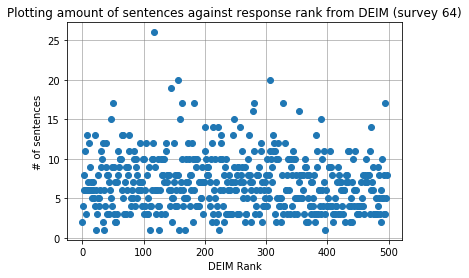

In [120]:
plt.plot([len(no_f[i].split('.')) for i in get_index(ranks_144, response_number)], 'o')
plt.title('Plotting amount of sentences against response rank from DEIM (survey 64)');
plt.ylabel('# of sentences');
plt.xlabel('DEIM Rank');
plt.grid(color='grey', linestyle='-', linewidth=.5)

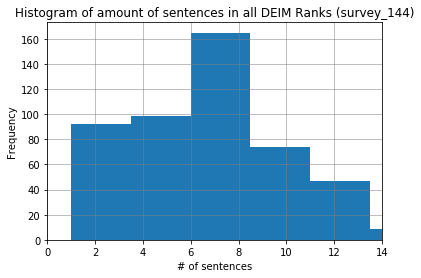

In [121]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_144, response_number)])
plt.title('Histogram of amount of sentences in all DEIM Ranks (survey_144)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 14);

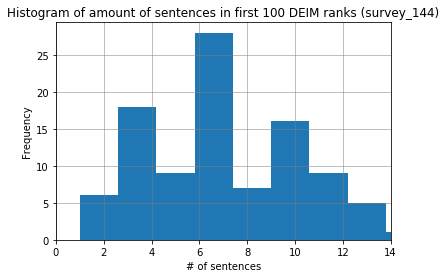

In [122]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_144, response_number)][:100])
plt.title('Histogram of amount of sentences in first 100 DEIM ranks (survey_144)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 14);

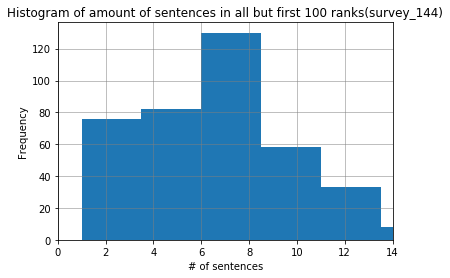

In [124]:
plt.hist([len(no_f[i].split('.')) for i in get_index(ranks_144, response_number)][100:])
plt.title('Histogram of amount of sentences in all but first 100 ranks(survey_144)');
plt.ylabel('Frequency');
plt.xlabel('# of sentences');
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xlim(0, 14);

In [125]:
full = model.encode(no_f)

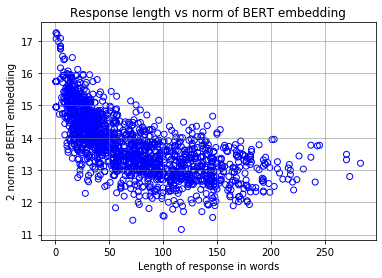

In [126]:
plt.scatter([len(i.split(' ')) for i in no_f], [np.linalg.norm(i) for i in full], color = 'blue', facecolor = 'none')
plt.title('Response length vs norm of BERT embedding')
plt.xlabel('Length of response in words')
plt.ylabel('2 norm of BERT embedding');
plt.grid(color='grey', linestyle='-', linewidth=.5)